In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!cp -r '/content/drive/MyDrive/Model1/train (YOLOv8x.yaml, 5 эпох)/' '/content/'


In [3]:
import shutil
import zipfile

# Укажите путь к zip-файлу на Google Диске
zip_file_path = '/content/drive/MyDrive/Model1/dataset_1.0.zip'

# Укажите путь, куда вы хотите скопировать zip-файл в Google Colab
dest_zip_path = '/content/dataset_1.0.zip'

# Копируйте zip-файл с Google Диска в Google Colab
shutil.copyfile(zip_file_path, dest_zip_path)

# Распакуйте zip-файл
with zipfile.ZipFile(dest_zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')


In [4]:
pip install comet_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.2/567.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 512.2/512.2 kB 743.2 kB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.4
    Uninstalling websocket-client-1.6.4:
      Successfully uninstalled websocket-client-1.6.4
  Attempting uninstall: python-box
    Found existing installation: python-box 7.1.1
    Uninstalling python-box-7.1.1:
      Successfully uninstalled python-box-7.1.1


In [5]:
logger = 'Comet' #@param ['Comet', 'TensorBoard']

if logger == 'Comet':
  %pip install -q comet_ml
  import comet_ml; comet_ml.init()
elif logger == 'TensorBoard':
  %load_ext tensorboard
  %tensorboard --logdir .

In [ ]:
from comet_ml import Experiment
from comet_ml.integration.pytorch import log_model

experiment = Experiment(
  api_key="6xKNY0XcmbGCBA9pqupoXYfBR",
  project_name="general",
  workspace="natagoto"
)

In [6]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=F1MKXAAFPQ8H0PKGLLUT
%env CLEARML_API_SECRET_KEY=cTsMlTpgte3O15oyIoKdUZFeJ5ijd59Q71sfB0jhcectxjRI12

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=F1MKXAAFPQ8H0PKGLLUT
env: CLEARML_API_SECRET_KEY=cTsMlTpgte3O15oyIoKdUZFeJ5ijd59Q71sfB0jhcectxjRI12


In [7]:
# Импорт необходимых библиотек для работы с YOLO и обучения модели
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Импорт библиотек для работы с файловой системой и визуализации
import os
import matplotlib.pyplot as plt

print("Библиотеки успешно импортированы.")


Библиотеки успешно импортированы.


In [8]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 31.1/78.2 GB disk)


In [9]:
import yaml

with open("/content/data4.yaml", 'r') as stream:
    try:
        data = yaml.safe_load(stream)
        print("Пути в YAML-файле после обновления:")
        print(data)
    except yaml.YAMLError as exc:
        print(exc)


Пути в YAML-файле после обновления:
{'names': ['Agricultural object', 'Fields', 'Forest', 'Grassland', 'Industrial facility', 'Power lines', 'Public facility', 'Residential facility', 'Road', 'Water'], 'nc': 10, 'test': '/content/dataset_1.0/test/images', 'test_labels': '/content/dataset_1.0/test/labels', 'train': '/content/dataset_1.0/train/images', 'train_labels': '/content/dataset_1.0/train/labels', 'val': '/content/dataset_1.0/valid/images', 'val_labels': '/content/dataset_1.0/valid/labels'}


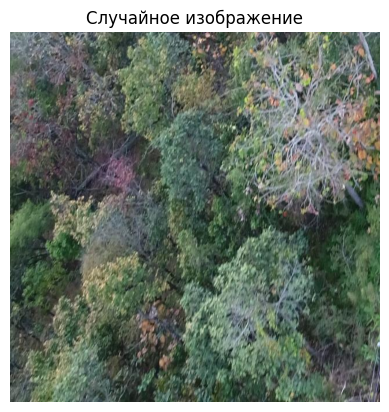

In [10]:
import os
import random
import cv2
from matplotlib import pyplot as plt

# Укажите путь к папке с изображениями
image_folder = '/content/dataset_1.0/train/images'

# Получите список всех файлов в папке
image_files = os.listdir(image_folder)

# Выберите случайное изображение из списка
random_image = random.choice(image_files)

# Получите полный путь к выбранному изображению
image_path = os.path.join(image_folder, random_image)

# Загрузите и отобразите выбранное изображение
try:
    image = cv2.imread(image_path)

    # Проверьте, удалось ли загрузить изображение
    if image is not None:
        # Отобразите изображение с помощью matplotlib
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title('Случайное изображение')
        plt.axis('off')
        plt.show()
    else:
        print(f'Не удалось загрузить изображение по пути: {image_path}')
except Exception as e:
    print(f'Произошла ошибка при загрузке изображения: {str(e)}')


In [11]:
pip install clearml


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.3 MB/s eta 0:00:00
  Attempting uninstall: pyjwt
    Found existing installation: PyJWT 2.3.0
    Uninstalling PyJWT-2.3.0:
      Successfully uninstalled PyJWT-2.3.0


In [12]:
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=F1MKXAAFPQ8H0PKGLLUT
%env CLEARML_API_SECRET_KEY=cTsMlTpgte3O15oyIoKdUZFeJ5ijd59Q71sfB0jhcectxjRI12

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=F1MKXAAFPQ8H0PKGLLUT
env: CLEARML_API_SECRET_KEY=cTsMlTpgte3O15oyIoKdUZFeJ5ijd59Q71sfB0jhcectxjRI12


In [13]:
pip install --upgrade urllib3


In [14]:
import pandas as pd
import numpy as np
from clearml import Task, Logger
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, ParameterSampler

from sklearn.metrics import roc_auc_score

project_name="YOLOv8"
task_name="colab_kernel_launcher"
# Создайте задачу
task = Task.init(project_name=project_name, task_name=task_name)

ClearML Task: created new task id=5fbe46a97a954c86b4fd9711c4922987
2023-10-14 09:27:23,970 - clearml.Task - INFO - No repository found, storing script code instead


ClearML results page: https://app.clear.ml/projects/df0d993d003845489adfbfe8b229f6d2/experiments/5fbe46a97a954c86b4fd9711c4922987/output/log


In [15]:
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 82.4 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.15.0
    Uninstalling wrapt-1.15.0:
      Successfully uninstalled wrapt-1.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.3.1
    Uninstalling ml-dtypes-0.3.1:
      Successfully uninstalled ml-dty

In [16]:
import os

# Путь к файлу labels.cache
cache_path = '/content/dataset_1.0/train/labels.cache'

# Проверяем, существует ли файл
if os.path.exists(cache_path):
    # Удаляем файл
    os.remove(cache_path)
    print(f'Файл {cache_path} удален.')
else:
    print(f'Файл {cache_path} не существует.')


Файл /content/dataset_1.0/train/labels.cache не существует.


In [17]:
import os

# Путь к папке с лейблами тренировочных данных
labels_folder_path = '/content/dataset_1.0/train/labels'

# Получаем список файлов в папке
label_files = os.listdir(labels_folder_path)

if not label_files:
    print("В папке с лейблами нет файлов.")
else:
    # Выводим содержимое первых двух файлов
    for i, label_file in enumerate(label_files[:2]):
        file_path = os.path.join(labels_folder_path, label_file)
        print(f"Содержимое файла {i + 1}: {label_file}")
        try:
            with open(file_path, 'r') as file:
                content = file.read()
                print(content)
        except Exception as e:
            print(f"Произошла ошибка при чтении файла: {str(e)}")
        print("\n")


Содержимое файла 1: DS1_YM2_525.txt
8 0.3076171875 0 0.3017578125 0.0160944203125 0.28125 0.020118025 0.2841796875 0.032188840625 0.310546875 0.036212446875 0.310546875 0.0764484984375 0.3046875 0.09254291875000001 0.2958984375 0.10461373437499999 0.2724609375 0.10461373437499999 0.263671875 0.11668455 0.287109375 0.1408261796875 0.298828125 0.173015021875 0.29296875 0.18106223125 0.3076171875 0.2011802578125 0.3193359375 0.2011802578125 0.322265625 0.2212982828125 0.3017578125 0.24946351875 0.2841796875 0.2575107296875 0.2548828125 0.2896995703125 0.2255859375 0.2896995703125 0.2138671875 0.30579399218750003 0.1787109375 0.30579399218750003 0.15234375 0.3500536484375 0.158203125 0.3581008578125 0.1435546875 0.378218884375 0.1376953125 0.3701716734375 0.1142578125 0.41040772499999995 0.0263671875 0.5069742484375 0 0.5190450640625001 0 0.583422746875 0.005859375 0.5914699578125 0 0.5995171671875 0 1 0.6162109375 1 0.6298828125 0.973712446875 0.6416015625 0.973712446875 0.65625 0.9535944

In [18]:
# Исходный код для запуска обучения с 1 эпохой и исходным YAML-файлом модели (предполагается, что модель имеет свой YAML-файл для 80 классов).
# Убедитесь, что вы находитесь в правильной директории и что у вас есть доступ к исполняемому файлу yolo или соответствующему скрипту для запуска обучения.

!echo "Начало обучения модели"
!yolo train model=yolov8s-seg.pt data='coco128-seg.yaml' epochs=1 imgsz=640  # Замените 'coco128-seg.yaml' на исходный YAML-файл модели, если он отличается
!echo "Обучение модели завершено"


Начало обучения модели
100% 22.8M/22.8M [00:01<00:00, 15.9MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=coco128-seg.yaml, epochs=1, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, k

In [21]:
from ultralytics import YOLO

# Загрузка предварительно обученной модели (рекомендуется для тренировки)
model = YOLO('yolov8s.pt')  # Замените 'yolov8.pt' на путь к вашей модели, если он отличается

# Тренировка модели
results = model.train(data='/content/data4.yaml', epochs=20, imgsz=640)  #
# Сохранение модели после тренировки
model.save('trained_model.pt')


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/data4.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=F

2023-10-14 10:18:05,645 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLOv8/colab_kernel_launcher.5fbe46a97a954c86b4fd9711c4922987/models/best.pt


COMET ERROR: Experiment.log_model() requires a file or folder


2023-10-14 10:18:16,264 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLOv8/colab_kernel_launcher.5fbe46a97a954c86b4fd9711c4922987/models/best.pt


COMET ERROR: Experiment.log_model() requires a file or folder


2023-10-14 10:18:27,588 - clearml.Task - INFO - Completed model upload to https://files.clear.ml/YOLOv8/colab_kernel_launcher.5fbe46a97a954c86b4fd9711c4922987/models/best.pt


AttributeError: ignored

In [20]:
from ultralytics import YOLO

print("Загрузка предварительно обученной модели...")
# Загрузка предварительно обученной модели
model = YOLO('yolov8s-seg.pt')

print("Начало обучения модели...")
# Обучение модели
results = model.train(data='/content/data4.yaml', epochs=20, imgsz=640)

print("Обучение модели завершено.")


Загрузка предварительно обученной модели...
2023-10-14 09:33:38,995 - clearml.model - INFO - Selected model id: 3493b5a2ab594e5e92cb95b7a4dd2157


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/data4.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

Начало обучения модели...


YOLOv8s-seg summary: 261 layers, 11793966 parameters, 11793950 gradients, 42.7 GFLOPs

Transferred 411/417 items from pretrained weights
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
COMET INFO: Experiment is live on comet.com https://www.comet.com/natagoto/yolov8/c146fa0b5bb843d2b1c9302711c6dcf1

optimizer: SGD(lr=0.01) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.001), 76 bias
train: Scanning /content/dataset_1.0/train/labels... 12715 images, 22 backgrounds, 0 corrupt: 100%|██████████| 12715/12715 [00:12<00:00, 1030.36it/s]
train: WARNING ⚠️ /content/dataset_1.0/train/images/DS1_02_1023.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/dataset_1.0/train/images/DS1_02_1148.jpg: 1 duplicat

RuntimeError: ignored

In [178]:
!echo "Начало обучения модели"
!yolo train model=yolov8s-seg.pt data='/content/data4.yaml' epochs=20 imgsz=640
!echo "Обучение модели завершено"


Начало обучения модели
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/data4.yaml, epochs=20, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opse

In [19]:
!ls runs/segment/train

args.yaml					    MaskF1_curve.png	   val_batch1_labels.jpg
BoxF1_curve.png					    MaskP_curve.png	   val_batch1_pred.jpg
BoxP_curve.png					    MaskPR_curve.png	   val_batch2_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	   val_batch2_pred.jpg
BoxR_curve.png					    results.csv		   weights
confusion_matrix.png				    val_batch0_labels.jpg
events.out.tfevents.1697275813.893435a680c0.5004.0  val_batch0_pred.jpg


In [112]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Загружаем предварительно обученную модель YOLOv8s-seg
model = YOLO(model='/content/yolov8s-seg.pt')

# Указываем путь к файлу конфигурации данных YAML
data_yaml = '/content/data.yaml'


model.train(data=data_yaml)  # запуск обучения модели на 20 эпох


# Предсказываем на одной изображении для теста
results = model('/content/Foto_9.jpg')

# Выводим предсказанное изображение
plt.imshow(results.render()[0])
plt.title("Predicted Image")
plt.axis("off")
plt.show()

# Выводим графики всех параметров обучения
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_results['train_loss'], label='Train Loss')
plt.plot(train_results['val_loss'], label='Validation Loss')
plt.title('Loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_results['train_accuracy'], label='Train Accuracy')
plt.plot(train_results['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Выводим матрицу ошибок
cm = confusion_matrix(train_results['val_labels'], train_results['val_preds'])
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.yaml, data=/content/data.yaml, epochs=100, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=False, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms

ClearML Task: created new task id=888cc1bc8f344111a61d946dc73ebba2
ClearML results page: https://app.clear.ml/projects/df0d993d003845489adfbfe8b229f6d2/experiments/888cc1bc8f344111a61d946dc73ebba2/output/log


COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.


ClearML results page: https://app.clear.ml/projects/df0d993d003845489adfbfe8b229f6d2/experiments/888cc1bc8f344111a61d946dc73ebba2/output/log
ClearML Monitor: GPU monitoring failed getting GPU reading, switching off GPU monitoring


COMET INFO: Experiment is live on comet.com https://www.comet.com/natagoto/yolov8/937b427415fd468fbbf704d4e440e8fc

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: sklearn, torch.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/natagoto/yolov8/937b427415fd468fbbf704d4e440e8fc
COMET INFO:   Parameters:
COMET INFO:     agnostic_nms    : False
COMET INFO:     augment         : False
COMET INFO:     batch           : 16
COMET INFO:     box             : 7.5
COMET INFO:     boxes           : True
COMET INFO:     cache           : False
COMET INFO:     cfg             : 1
COMET INFO:     classes         : 1
COMET INFO:     close_mo

AssertionError: ignored